In [1]:
# import the necessary modules
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

quandl.ApiConfig.api_key = 'tJKSQn1pHLbyo1mu1wYn'
sns.set_style('darkgrid')

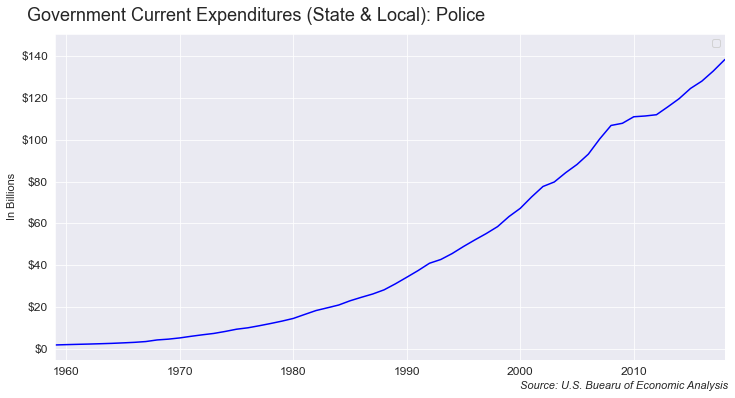

In [2]:
# Extracting the data from FRED, starting from 1959; changing the column name
df = quandl.get('FRED/G160851A027NBEA', start_date='1959-01-01')
df.rename(columns={'Value': 'Police'}, inplace=True)

# formatting the tick marks of the y-axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

# plotting the police expenditures
ax = df.plot(color='blue', xlim=('1959-01-01', '2018-01-01'), figsize=(12, 6))
ax.set_xlabel('Source: U.S. Buearu of Economic Analysis',
              style='italic', fontsize=11, x=.85)
ax.set_ylabel('In Billions', fontsize=11)
ax.set_title(
    'Government Current Expenditures (State & Local): Police', fontsize=18, x=.3, y=1.02)
ax.legend('')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_formatter(tick)
plt.savefig('police_expenditures.png', bbox_inches='tight')

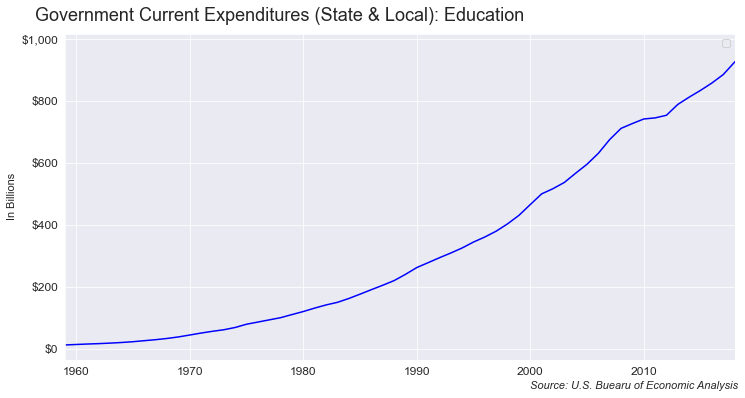

In [3]:
# extracting the data from teachers expenditures, starting from 1959.
df2 = quandl.get('FRED/G161071A027NBEA', start_date='1959-01-01')

# plotting the expenditures from teachers
ax2 = df2.plot(color='blue', xlim=(
    '1959-01-01', '2018-01-01'), figsize=(12, 6))
ax2.set_xlabel('Source: U.S. Buearu of Economic Analysis',
               style='italic', fontsize=11, x=.85)
ax2.set_ylabel('In Billions', fontsize=11)
ax2.set_title(
    'Government Current Expenditures (State & Local): Education', fontsize=18, x=.32, y=1.02)
ax2.legend('')
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.yaxis.set_major_formatter(tick)
plt.savefig('teachers_expenditures.png', bbox_inches='tight')

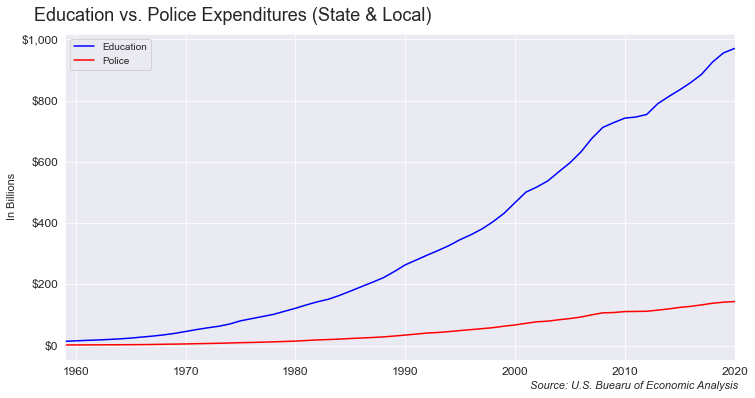

In [4]:
# merging the two plots
ax3 = df2.plot(color='blue', xlim=(
    '1959-01-01', '2018-01-01'), figsize=(12, 6))
df.plot(color='red', label='Police', ax=ax3)
ax3.set_xlabel('Source: U.S. Buearu of Economic Analysis',
               style='italic', fontsize=11, x=.85)
ax3.set_ylabel('In Billions', fontsize=11)
ax3.set_title('Education vs. Police Expenditures (State & Local)',
              fontsize=18, x=.25, y=1.02)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.legend(['Education', 'Police'])
ax3.yaxis.set_major_formatter(tick)
plt.savefig('teachers_police.png', bbox_inches='tight')

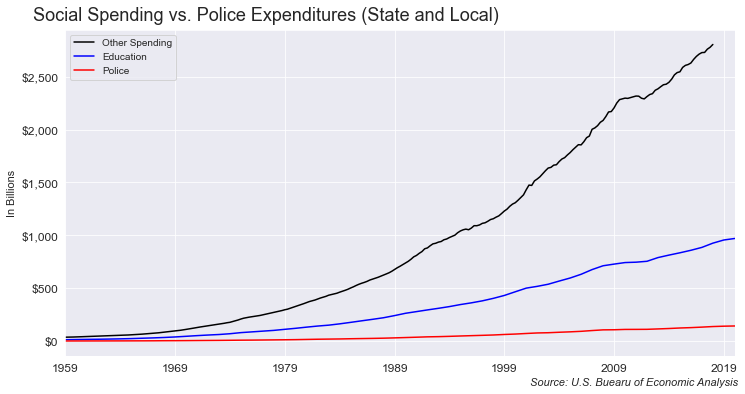

In [5]:
# introducting total expenditures from state and local
df3 = quandl.get(
    'FRED/SLEXPND', start_date='1959-01-01', end_date='2018-01-01')
ax4 = df3.plot(color='black', xlim=(
    '1959-01-01', '2018-01-01'), label='Other Spending', figsize=(12, 6))
df2.plot(color='blue', label='Education', ax=ax4)
df.plot(color='red', label='Police', ax=ax4)
ax4.legend(['Other Spending', 'Education', 'Police'])
ax4.set_title(
    'Social Spending vs. Police Expenditures (State and Local)', fontsize=18, x=.30, y=1.01)
ax4.set_xlabel('Source: U.S. Buearu of Economic Analysis',
               style='italic', fontsize=11, x=.85)
ax4.set_ylabel('In Billions', fontsize=11)
ax4.tick_params(axis='x', labelsize=12)
ax4.tick_params(axis='y', labelsize=12)
ax4.yaxis.set_major_formatter(tick)
plt.savefig('social_spending_police.png', bbox_inches='tight')